**Practica 1 de laboratorio**

*Formula del área de la elipse*
$$A(a, b) = \frac{a}{2} \frac{b}{2} \pi $$

*Formula de la propagación de errores*

$$\sigma_A = \bigg[ \bigg( \frac{dA}{da} \Bigg|_{a_0,\space b_0} \sigma_a \bigg)^2 + \bigg( \frac{dA}{db} \Bigg|_{a_0, \space b_0} \sigma_b \bigg)^2 \bigg]^{\frac{1}{2}}
$$
$$ \sigma_A = \bigg[ \bigg( \frac{1}{4} b_0 \pi \bigg)^2\sigma_b + \bigg( \frac{1}{4} a_0 \pi \bigg)^2\sigma_a \bigg]^{\frac{1}{2}}

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('pr1.mplstyle')

In [4]:
df = pd.read_csv('leaves.csv')

cA = df[df['class'] == 'A']
cB = df[df['class'] == 'B']
cC = df[df['class'] == 'C']
cD = df[df['class'] == 'D']
cE = df[df['class'] == 'E']

print(cA)

  class  id    weight  length  width         area
0     A   1  0.470000      66     29  1503.252085
1     A   2  0.456667      59     32  1482.831732
2     A   3  0.300000      63     25  1237.002107
3     A   4  0.236667      53     23   957.400361
4     A   5  0.370000      58     33  1503.252085


**Ploteamos masa vs largo, masa vs ancho, etc.**


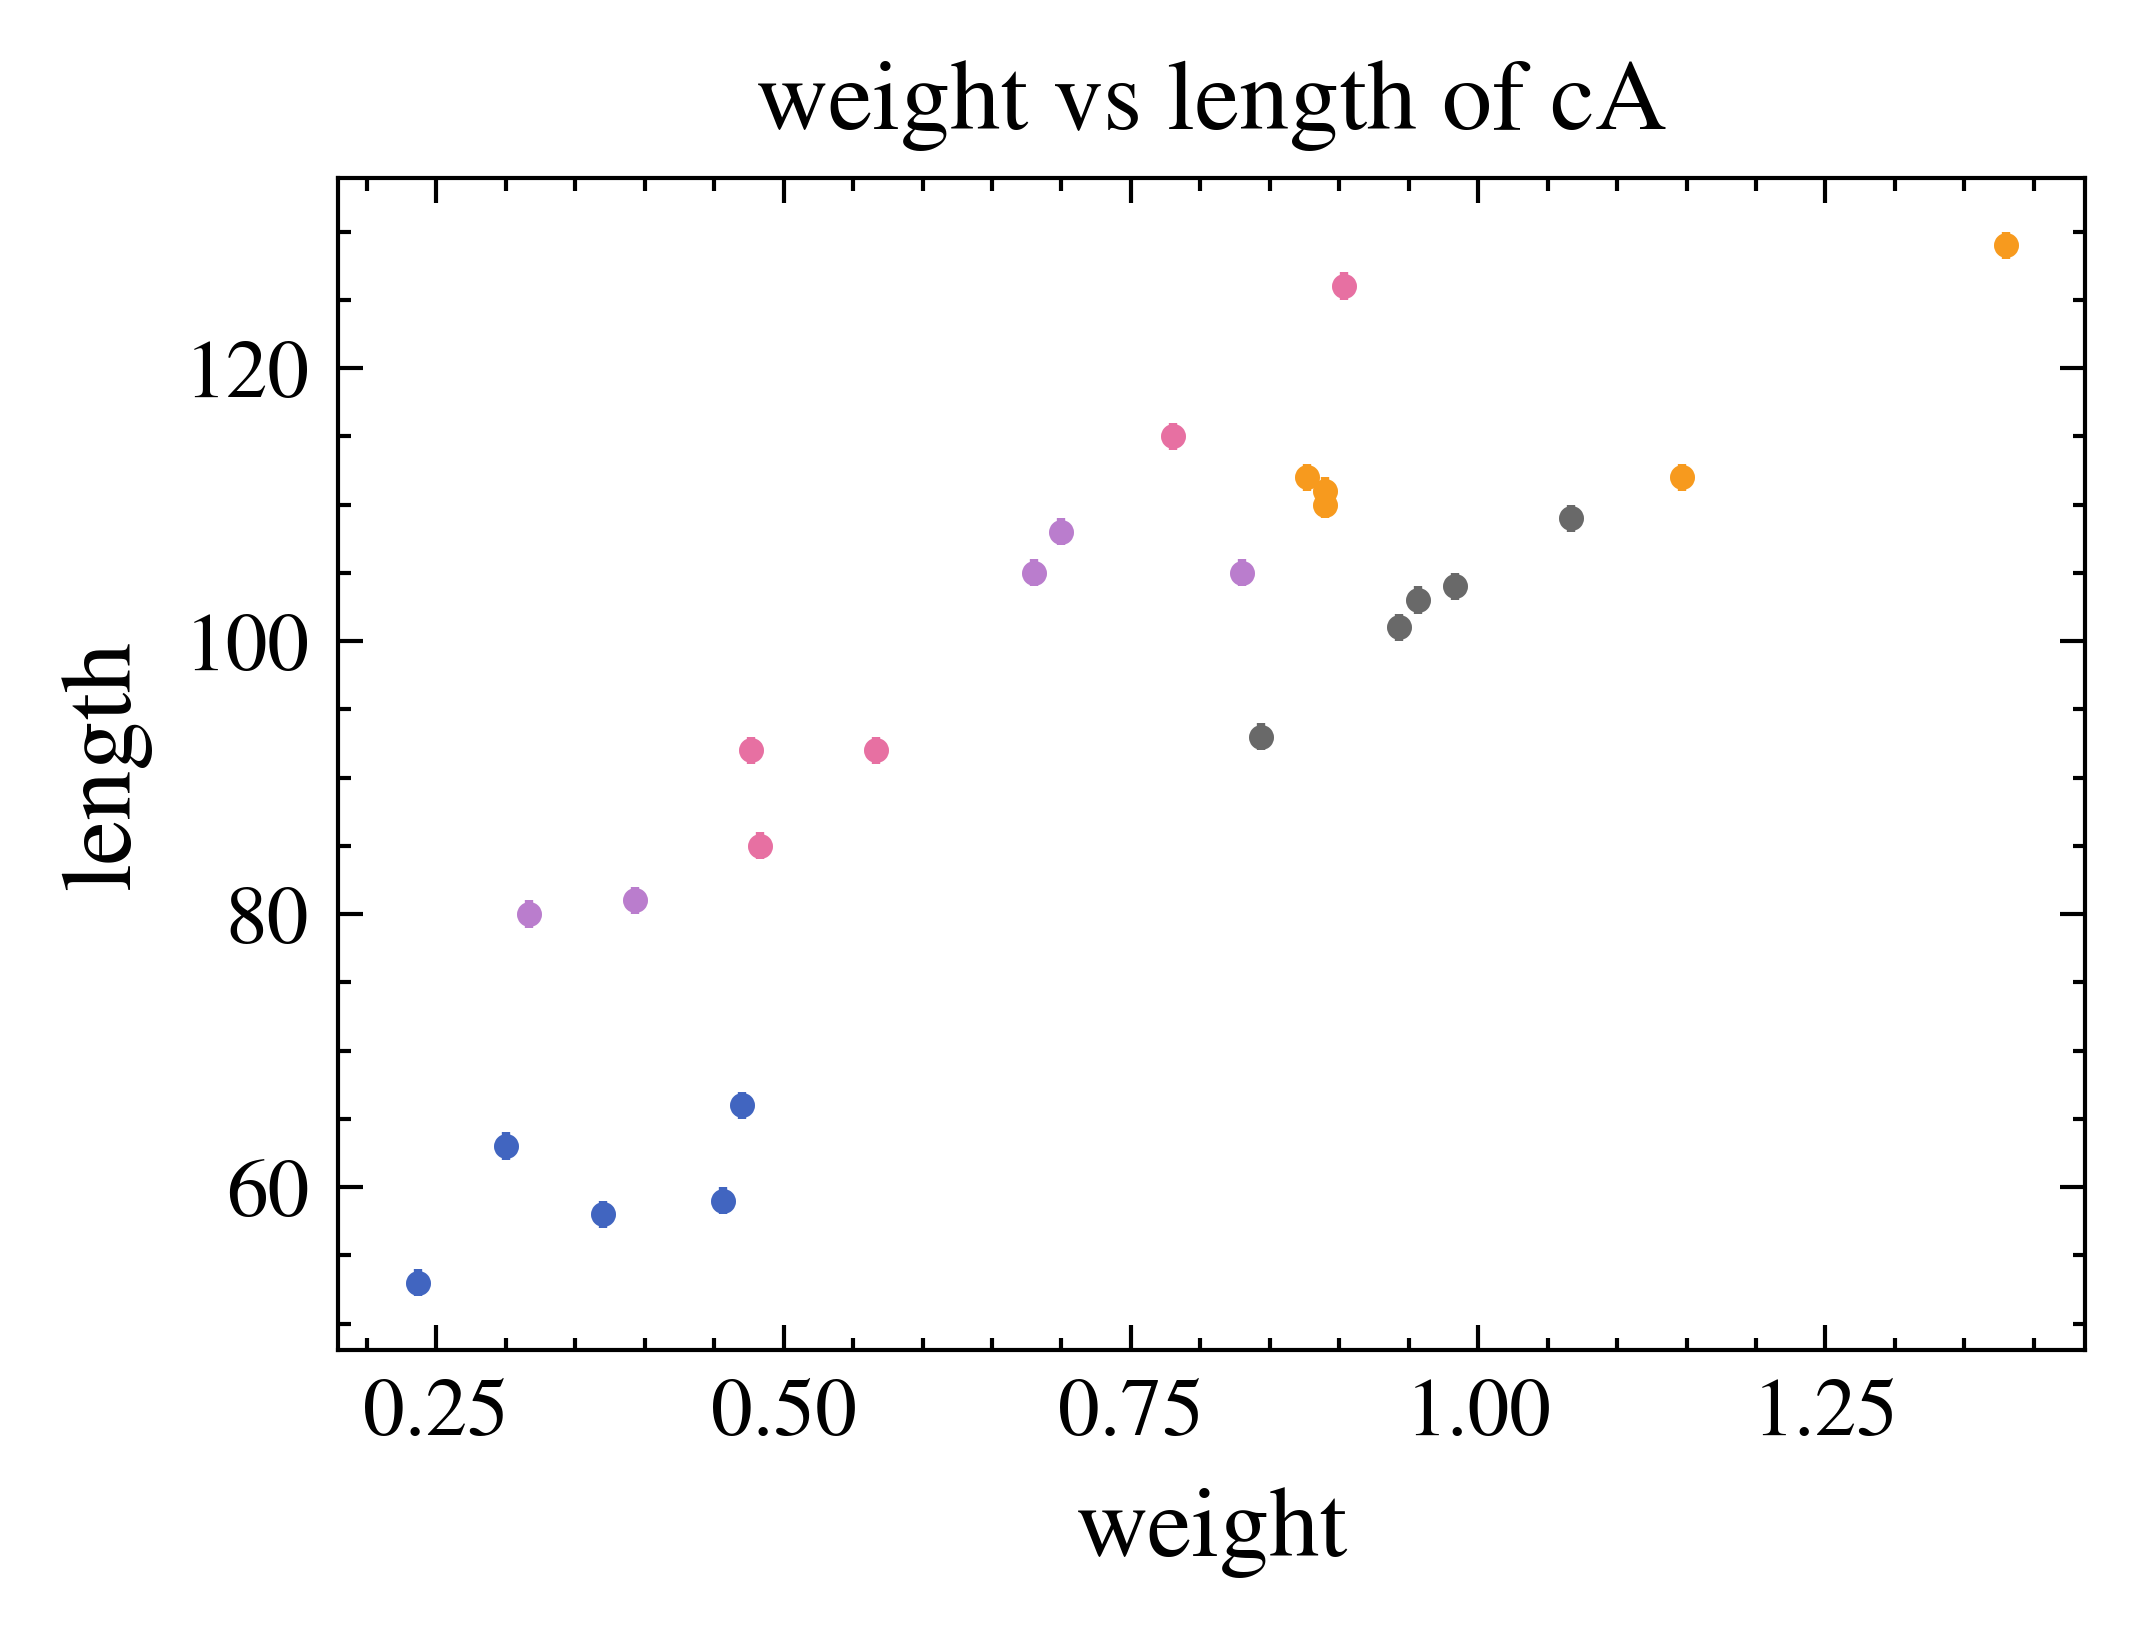

In [5]:
#plot the weight vs lenght of the cA
# plt.plot(cA['weight'], cA['length'], 'o')
diameter_points = 2
tol = 1
plt.errorbar(cA['weight'], cA['length'], xerr=0, yerr=tol, fmt='o', label='Class A', ms=diameter_points)
plt.errorbar(cB['weight'], cB['length'], xerr=0, yerr=tol, fmt='o', label='Class B', ms=diameter_points)
plt.errorbar(cC['weight'], cC['length'], xerr=0, yerr=tol, fmt='o', label='Class C', ms=diameter_points)
plt.errorbar(cD['weight'], cD['length'], xerr=0, yerr=tol, fmt='o', label='Class D', ms=diameter_points)
plt.errorbar(cE['weight'], cE['length'], xerr=0, yerr=tol, fmt='o', label='Class E', ms=diameter_points)
plt.xlabel('weight')
plt.ylabel('length')

plt.title('weight vs length of cA')
plt.show()



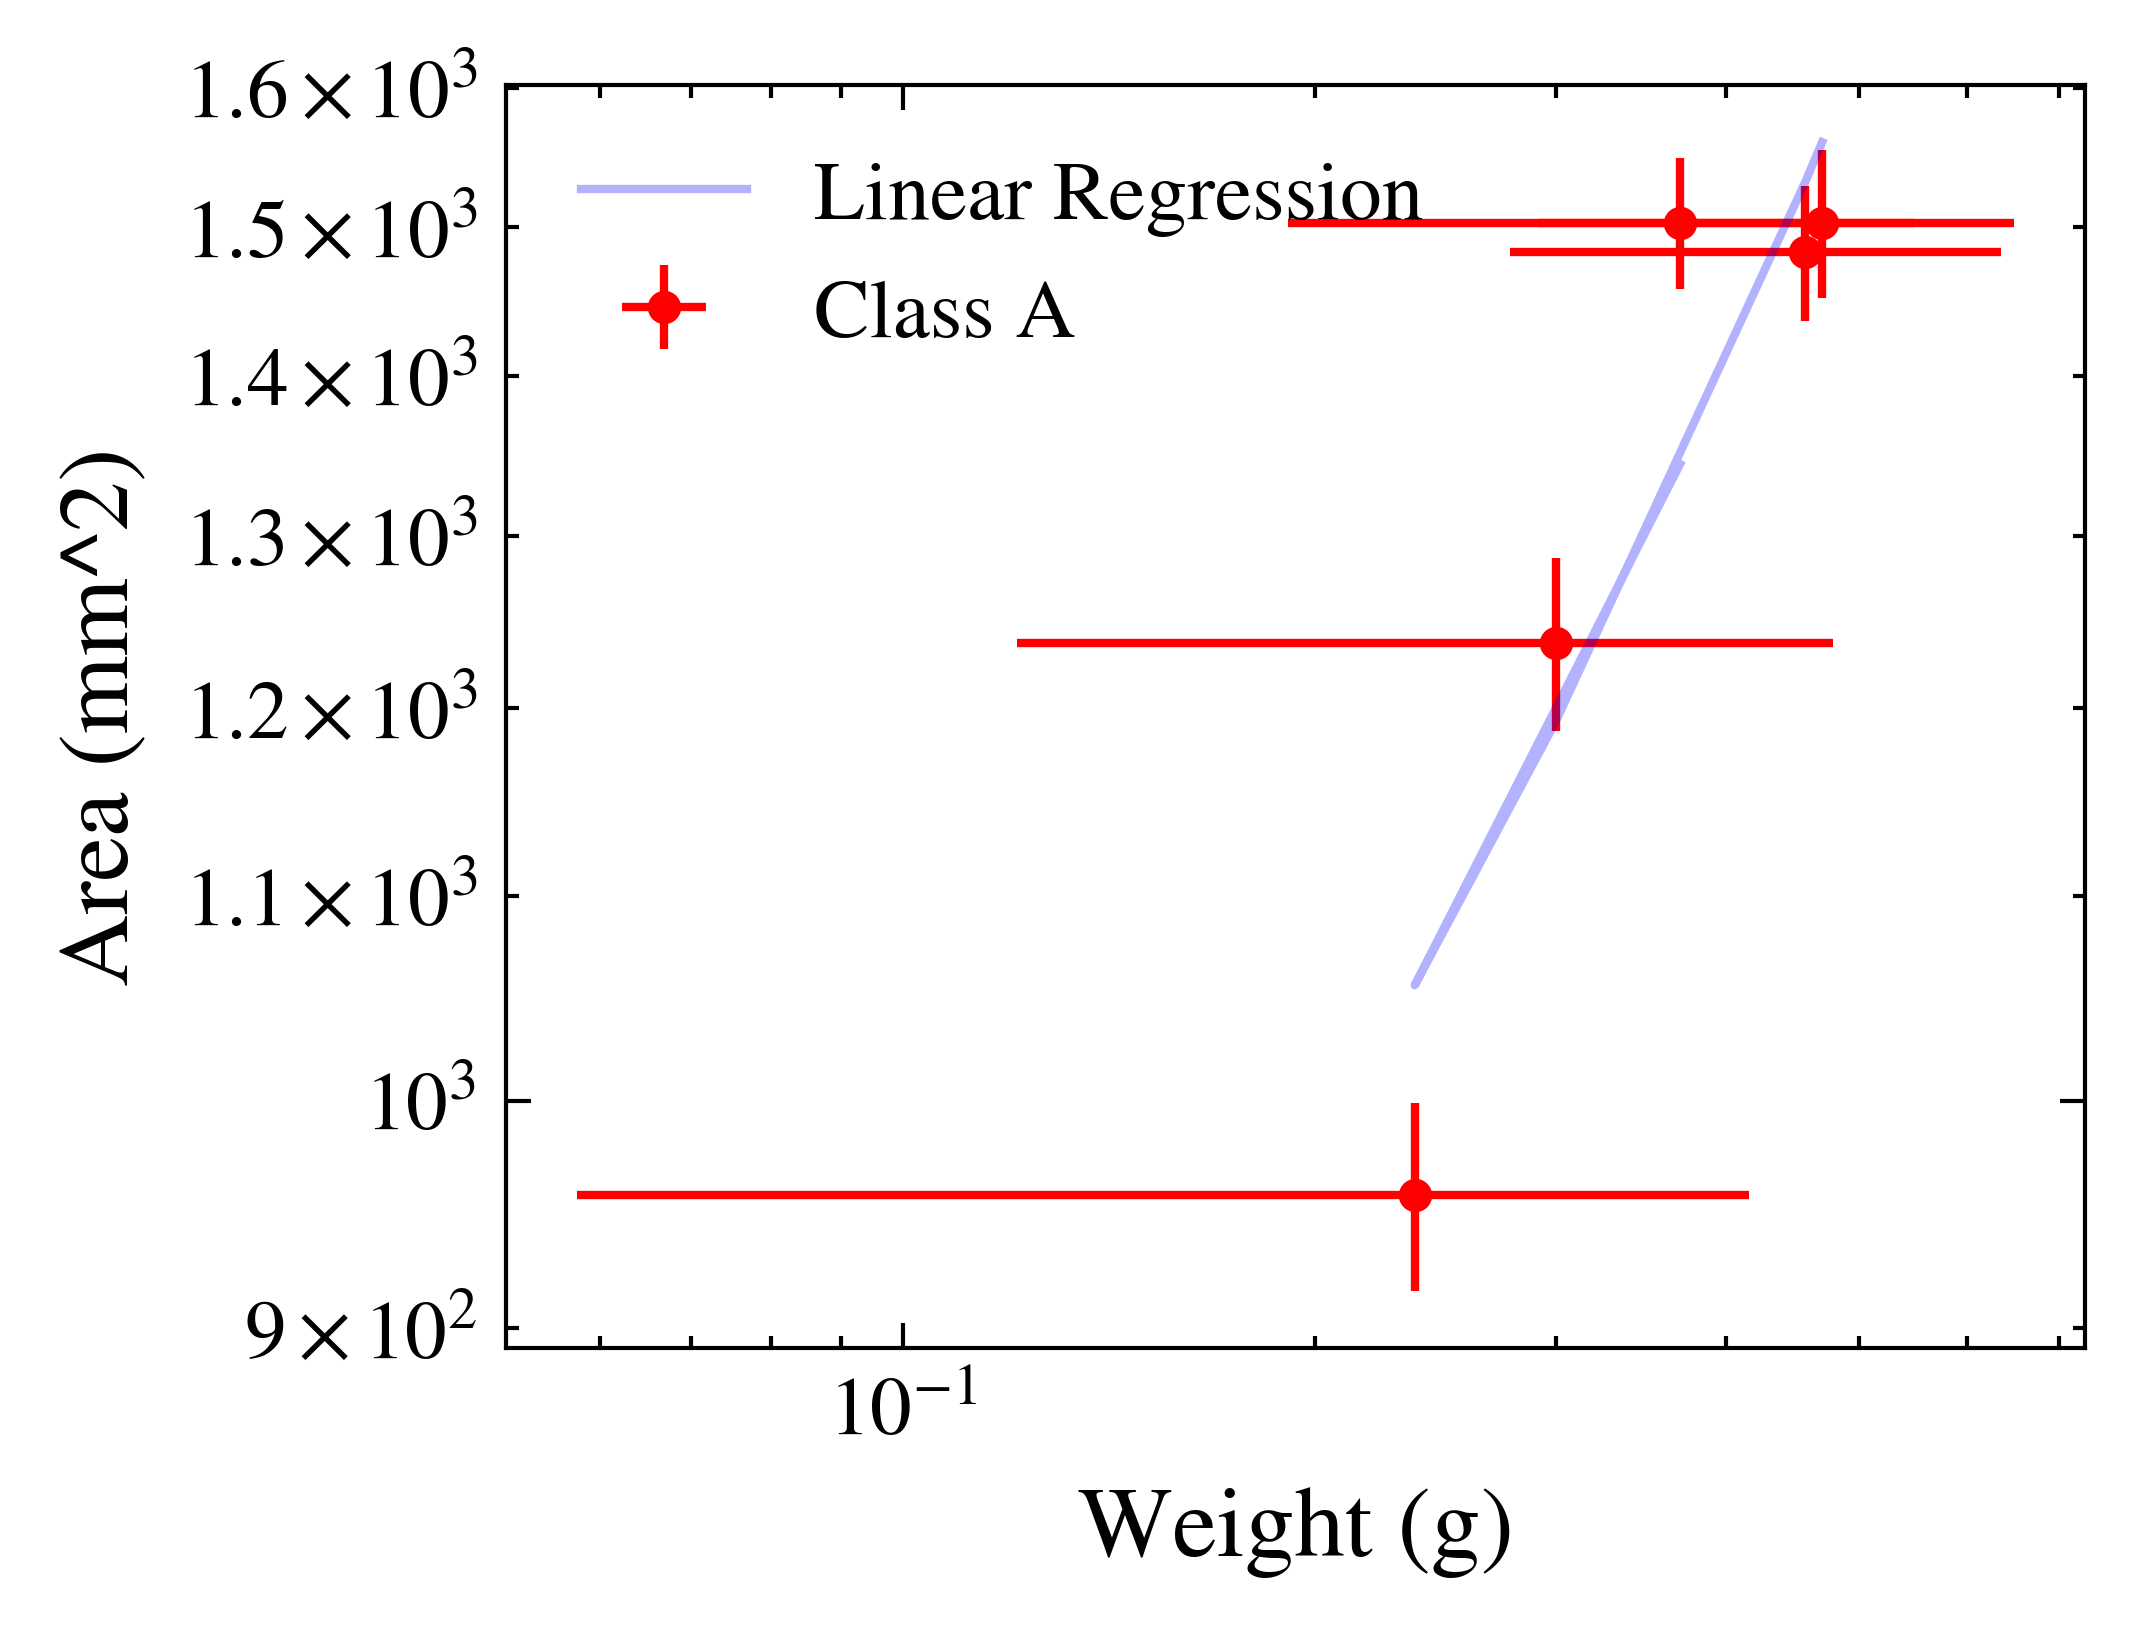

In [6]:
#calculate the standard deviation of the each data classes
#we use the relative error of each measurement
tol = 1 #Absolut error of each sample (width and lenght) (mm)

sigmaArea = [((1/4 * b0 * np.pi)**2 * tol**2 +  (1/4 * a0 * np.pi)**2 * tol**2)**0.5 for a0, b0 in zip(cA['weight'], cA['length'])]
sistematicWeightError = (3* (0.1**2))**0.5
sigmaWeightMeanError = np.std((cA['weight'])/(len(cA['weight'])**0.5), ddof=1)
tol = (sistematicWeightError**2 + sigmaWeightMeanError**2)**0.5
plt.errorbar(cA['weight'], cA['area'], yerr=sigmaArea, xerr=tol, fmt='o', label='Class A', ms=3, color='red')

regression_coeffs = np.polyfit(cA['weight'], cA['area'], 1)
regression_line = np.polyval(regression_coeffs, cA['weight'])
plt.plot(cA['weight'], regression_line, label='Linear Regression', color='blue', alpha=0.3)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Weight (g)')
plt.ylabel('Area (mm^2)')
plt.legend()
plt.show()

